# 🏦 **CAMPAÑA DE MARKETING BANKARIO** 🏦

<br>

### **PASO 1: IMPORTACIÓN DE LIBRERÍAS**

In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings

# To supress warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

### **PASO 2: PLANTEAMIENTO DEL PROBLEMA Y EXPLORACIÓN DE DATOS**

In [16]:
pd.options.display.max_columns=None
bank = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [17]:
bank.to_csv("../data/raw/bank_data.csv", index=False)

 **EXPLORACIÓN Y LIMPIEZA DE DATOS**

In [18]:
# Obtención de las dimensiones del dataset
print("\033[1mLas dimensiones del Dataset son:\033[0m")
print(bank.shape)

Las dimensiones del Dataset son:
(41188, 21)


In [19]:
# Otención sobre tipos de datos y valores NO nulos 

print("\n\033[1mTIPOS DE DATOS:\033[0m\n")
print(bank.info())


TIPOS DE DATOS:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx

In [20]:
# Obtención de la descripción de las estadísticas del conjunto de datos:
bank.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [21]:
# Analyze the types of information we have
print("Data types present in the dataset:", bank.dtypes.unique())

# Identify numerical and categorical variables
numerical_vars = bank.select_dtypes(include=['float', 'int']).columns
categorical_vars = bank.select_dtypes(include=['O']).columns

# Count the number of numerical and categorical variables
num_numerical_vars = len(numerical_vars)
num_categorical_vars = len(categorical_vars)

# Display results
print(f"Number of categorical variables: {num_categorical_vars}")
print("Categorical variables:", list(categorical_vars))
print('\n')
print(f"Number of numerical variables: {num_numerical_vars}")
print("Numerical variables:", list(numerical_vars))

Data types present in the dataset: [dtype('int64') dtype('O') dtype('float64')]
Number of categorical variables: 11
Categorical variables: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


Number of numerical variables: 10
Numerical variables: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


**IDENTIFICANDO VALORES NULOS**

In [22]:
# Transforming 'unknown' and 'nonexistent' values into NaN for consistent handling of missing data
bank.replace(['unknown', 'nonexistent'], np.nan, inplace=True)

# Display the modified DataFrame
bank.head()  

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


**ELIMINANDO DUPLICADOS**

In [23]:
# Display initial row count
initial_row_count = bank.shape[0]

# Check and remove duplicates
num_duplicates = bank.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    bank = bank.drop_duplicates()
    print(f"Duplicate rows have been removed. Row count reduced from {initial_row_count} to {bank.shape[0]}.")
else:
    print("No duplicate rows found.")

Number of duplicate rows: 12
Duplicate rows have been removed. Row count reduced from 41188 to 41176.


## **PASO 3: ANALISIS DE VARIABLES UNIVARIANTES**

**ANÁLISIS DE VARIABLES CATEGÓRICAS**

In [24]:
# Split the original dataframe by numerical and categorical values

num = ['int64', 'float64']
cat = ['O']

bank_numerical = bank.select_dtypes(num)
bank_categorical = bank.select_dtypes(cat)

In [25]:
bank_categorical.head(3)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,NaN,no
1,services,married,high.school,NaN,no,no,telephone,may,mon,NaN,no
2,services,married,high.school,no,yes,no,telephone,may,mon,NaN,no


In [26]:
def plot_categorical_variables(bank_categorical, hue='y'):
    """
    Plots count charts for all categorical variables in `bank_categorical` using a 3-column layout.

    Parameters:
    - bank_categorical: DataFrame containing only the categorical columns to analyze.
    - hue: Color variable for the columns (optional), like the target variable if relevant.
    """
    
    # Obtém todas as colunas categóricas de `bank_categorical`
    categorical_columns = bank_categorical.columns.tolist()

    # Configura o layout dos subplots para ter 3 colunas
    num_cols = 3
    num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  # Calcula o número de linhas necessárias
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 5 * num_rows))

    # Achata o array de eixos para facilitar a iteração
    axes = axes.flatten()

    # Loop para criar gráficos de contagem para cada variável categórica
    for i, col in enumerate(categorical_columns):
        sns.countplot(ax=axes[i], data=bank_categorical, x=col, hue=hue)
        axes[i].set_title(f"{col}", fontsize=14, fontweight='bold')
        axes[i].tick_params(axis='x', rotation=90)

    # Remove eixos extras se houver menos colunas que subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

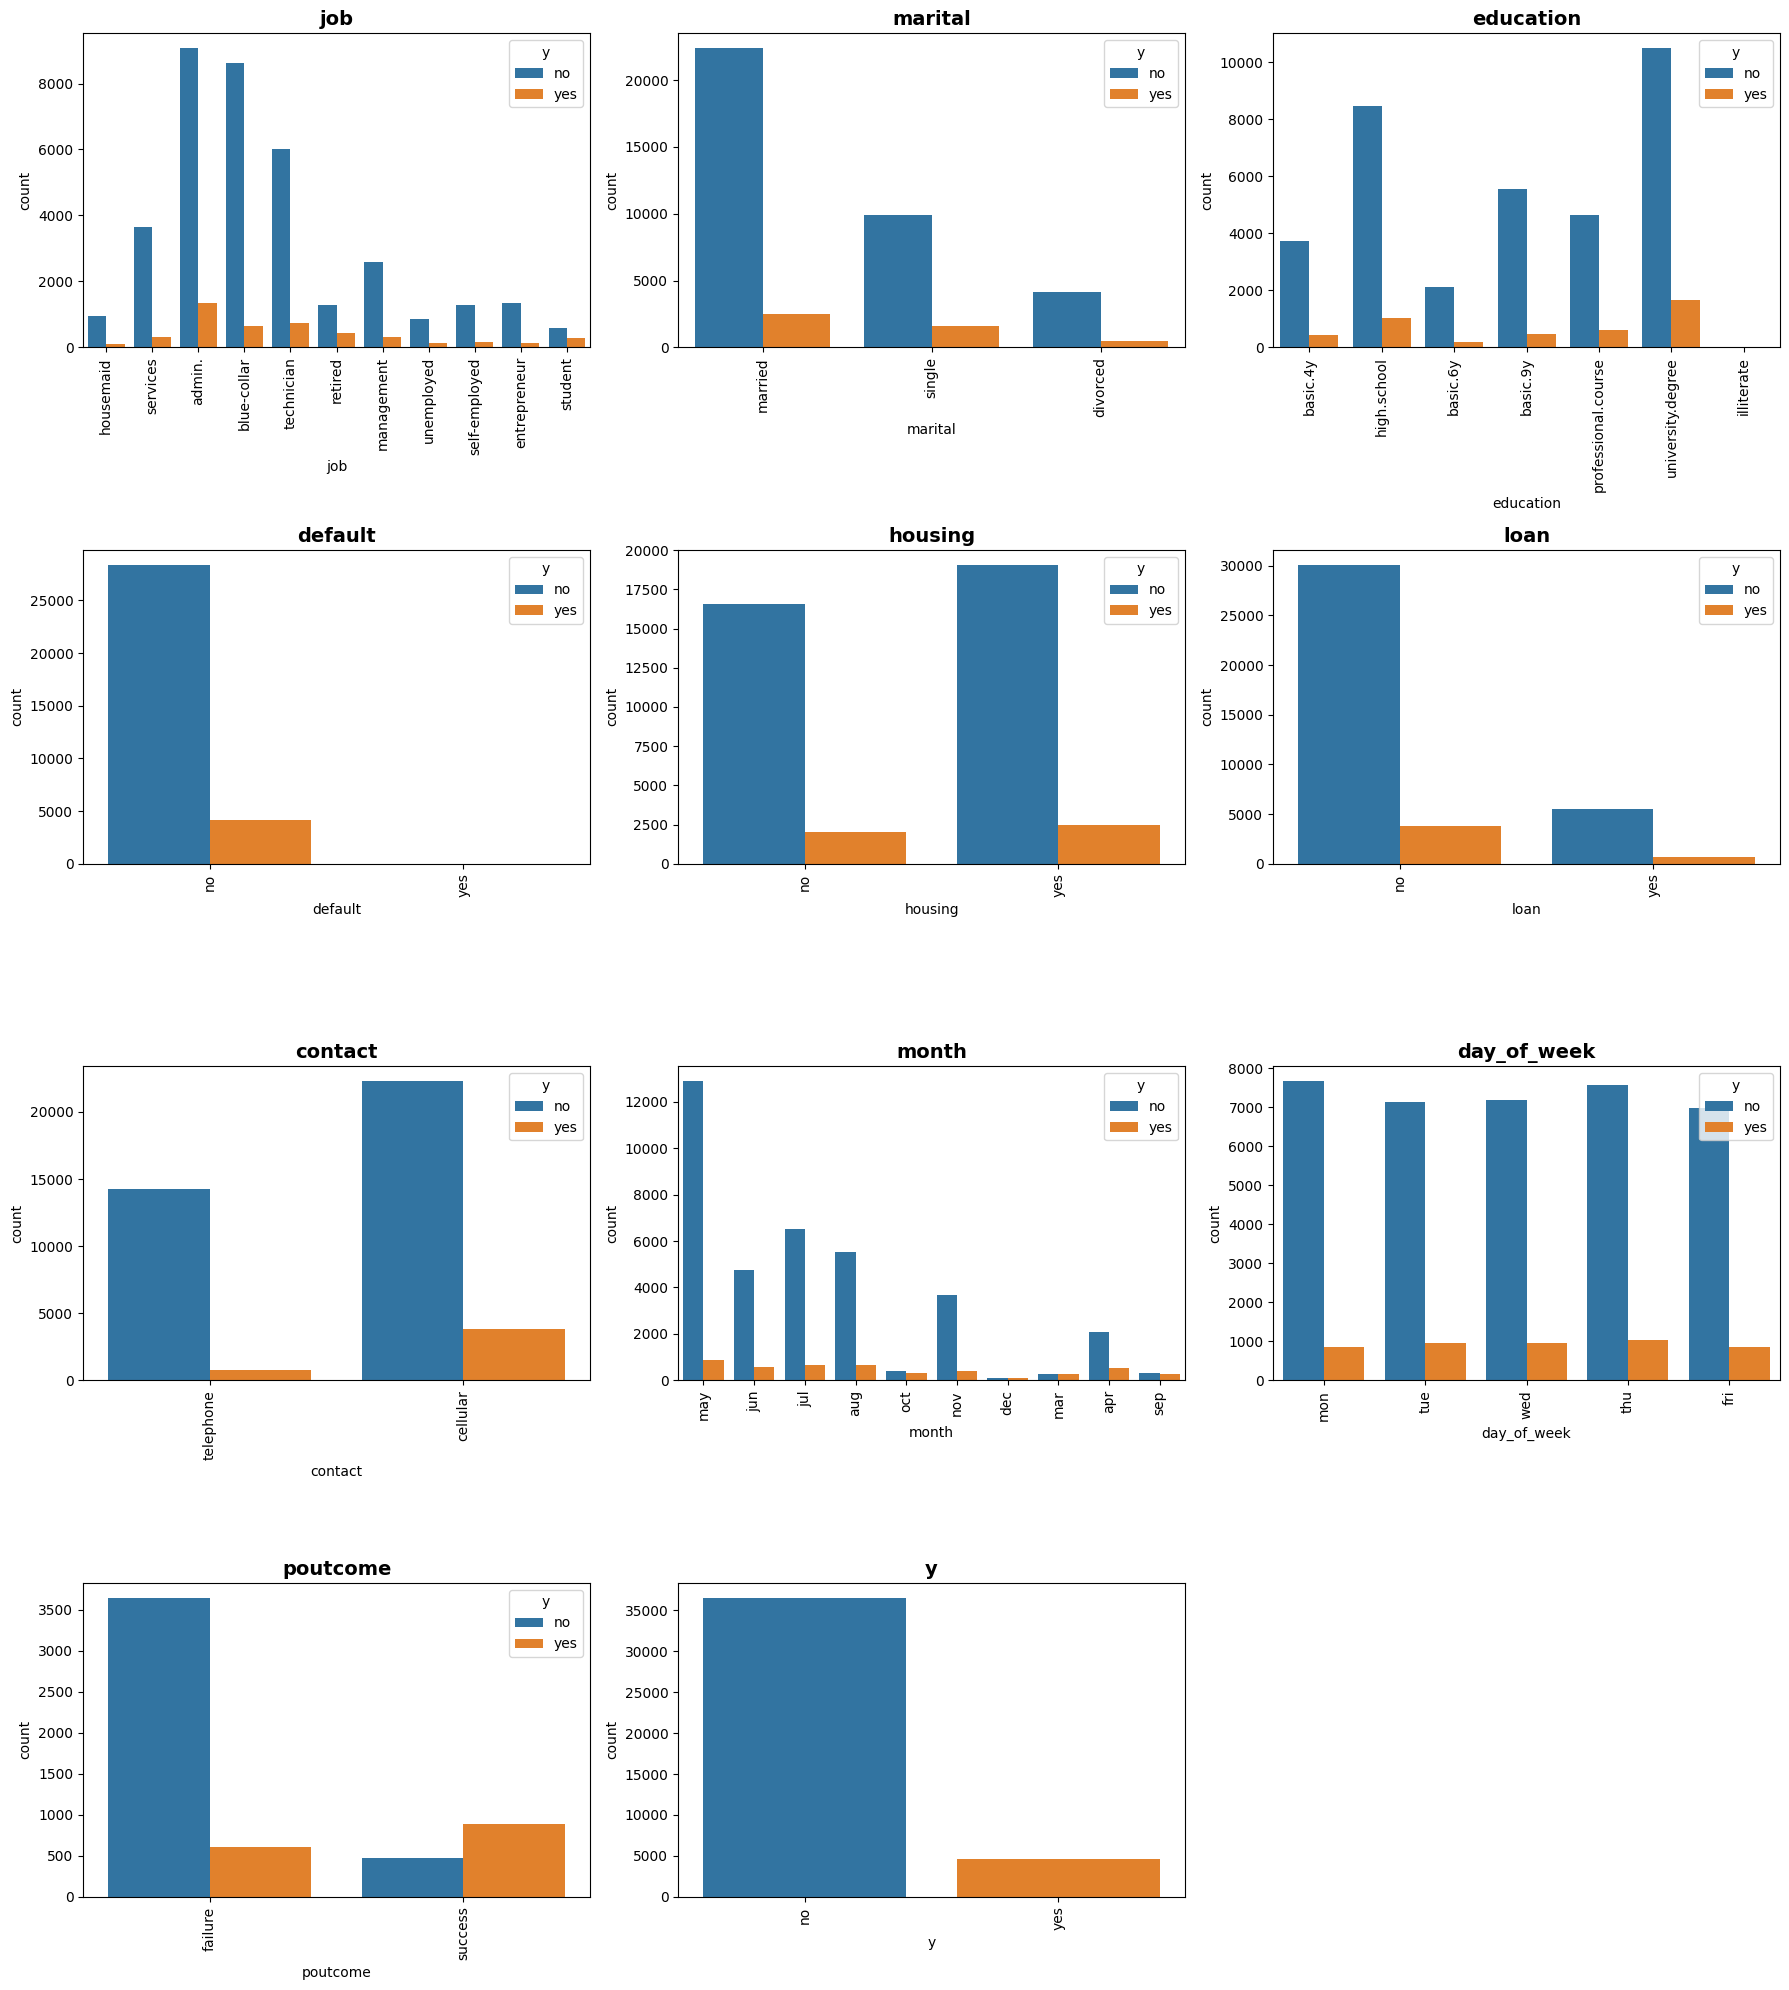

In [27]:
plot_categorical_variables(bank_categorical, hue='y')

**ANÁLISIS DE VARIABLES NUMÉRICAS**

In [28]:
bank_numerical.head(3)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [29]:
def plot_numerical_variables(bank_numerical, hue=None): 
    """
    Plots histograms and boxplots for all numeric variables in `bank_numerical`
    using a 2-column layout with a fixed color palette for visual consistency.

    Parameters:
    - bank_numerical: DataFrame containing only the numerical columns to analyze.
    - hue: Column name for hue (optional). If provided, it must exist in `bank_numerical`.
    """
    # Get all numerical columns from `bank_numerical`
    numerical_columns = bank_numerical.columns.tolist()

    # Calculate the required number of rows
    num_vars = len(numerical_columns)
    num_rows = (num_vars + 1) // 2  # Divided by 2 columns, rounding up

    # Set up the layout of subplots
    fig, axes = plt.subplots(num_rows * 2, 2, figsize=(10, num_rows * 4))
    plt.suptitle('Distribution of Numerical Variables', fontsize=16, y=1.02)

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Define a fixed color palette
    palette = sns.color_palette("colorblind", num_vars)

    # Loop to create histograms and boxplots for each numerical variable
    for i, col in enumerate(numerical_columns):
        color = palette[i % len(palette)]  # Ensures the color index stays within the palette length
        
        # Histogram with or without hue
        sns.histplot(ax=axes[i * 2], data=bank_numerical, x=col, hue=hue if hue in bank_numerical.columns else None, color=color)
        axes[i * 2].set_title(col.capitalize(), fontweight='bold')  # Set the title in bold for the histogram
        
        # Boxplot (without hue)
        sns.boxplot(ax=axes[i * 2 + 1], data=bank_numerical, x=col, color=color)
        axes[i * 2 + 1].set_title(col.capitalize(), fontweight='bold')  # Set the title in bold for the boxplot
        axes[i * 2 + 1].set(xlabel=None)  # Remove x label from boxplot for consistency

    # Remove extra axes if there is an odd number of variables
    for j in range(i * 2 + 2, len(axes)):
        fig.delaxes(axes[j])

    # Adjust the layout to avoid overlapping
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

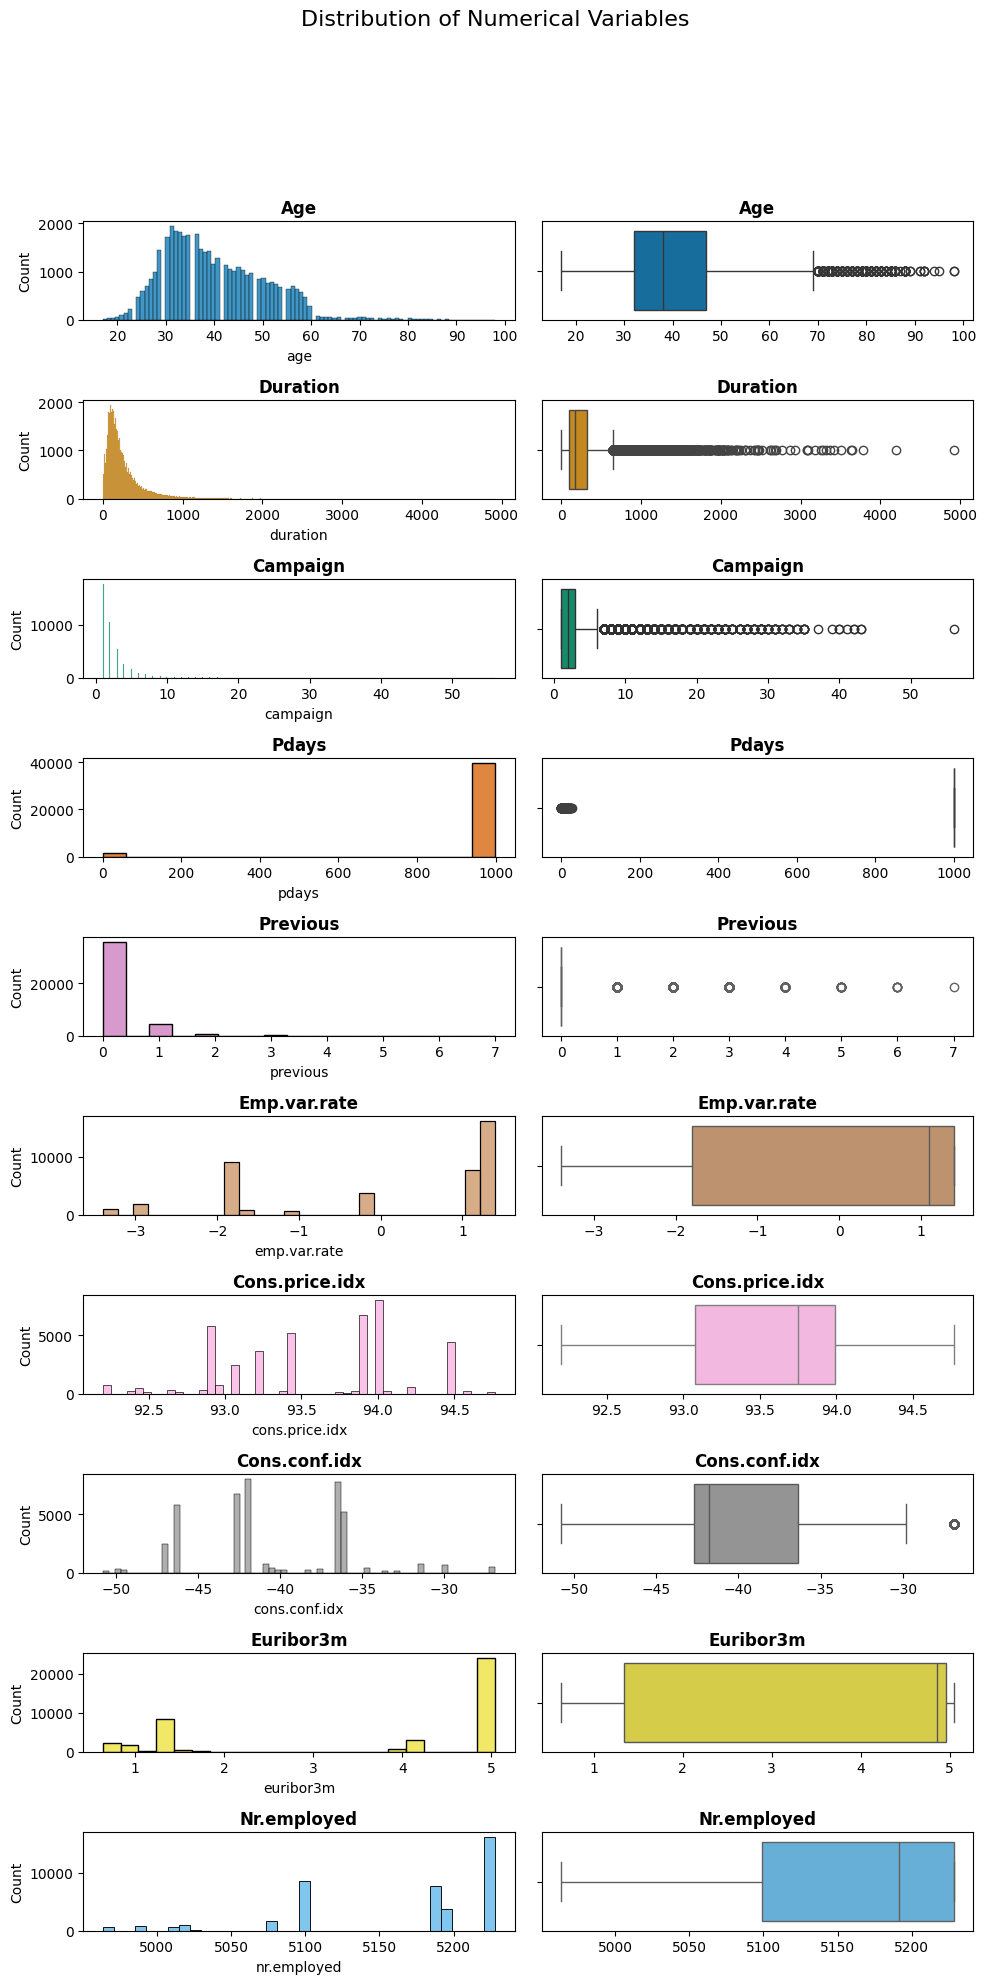

In [30]:
# Obtaining numerical variables graphs
plot_numerical_variables(bank_numerical, hue='y')

**NUEVO DATASET** (SIN INFORMACIÓN IRRELEVANTE)

In [31]:
# Define the list of columns to remove (both categorical and numerical)
columns_to_remove = ['month', 'day_of_week', 'duration', 'previous', 'cons.price.idx']

# Drop the specified columns from the DataFrame and store the result in a new DataFrame `bank_refined`
bank_refined = bank.drop(columns=columns_to_remove)

# Display the structure of the updated DataFrame to verify the changes
print("Updated DataFrame structure after removing columns:")
print(bank_refined.info())

Updated DataFrame structure after removing columns:
<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            41176 non-null  int64  
 1   job            40846 non-null  object 
 2   marital        41096 non-null  object 
 3   education      39446 non-null  object 
 4   default        32580 non-null  object 
 5   housing        40186 non-null  object 
 6   loan           40186 non-null  object 
 7   contact        41176 non-null  object 
 8   campaign       41176 non-null  int64  
 9   pdays          41176 non-null  int64  
 10  poutcome       5625 non-null   object 
 11  emp.var.rate   41176 non-null  float64
 12  cons.conf.idx  41176 non-null  float64
 13  euribor3m      41176 non-null  float64
 14  nr.employed    41176 non-null  float64
 15  y              41176 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage

In [32]:
# Current dataset
bank_refined.head()

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,1,999,NaN,1.1,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,1,999,NaN,1.1,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,1,999,NaN,1.1,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,1,999,NaN,1.1,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,1,999,NaN,1.1,-36.4,4.857,5191.0,no


**PASO 5: ANÁLISIS DE VARIABLES MULTIVARIANTES**

In [33]:
# Crear una copia del Dataframe original para aplicar anulaciones de codificación
bank_n = bank_refined.copy()

In [34]:
# Recorre cada columna para crear y guardar el codificador como JSON
bank_categorical = bank_refined.select_dtypes(include='object').columns
os.makedirs('../data/interim/enc', exist_ok=True)

for col in bank_categorical:
    # Obtener valores únicos y crear el diccionario de codificación
    unique_values = list(bank_refined[col].unique())
    encoder_dict = dict(zip(unique_values, range(len(unique_values))))
    
    # Guardar el diccionario de codificación como un archivo JSON
    with open(f'../data/interim/enc/{col}_n.json', 'w') as f:
        json.dump(encoder_dict, f)

In [35]:
for col in bank_categorical:
    with open(f'../data/interim/enc/{col}_n.json', 'r') as f:
        encoder_dict = json.load(f)
    bank_n[col] = bank_n[col].map(encoder_dict)

In [36]:
bank_n.head()

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.0,0.0,0.0,0.0,0.0,0.0,0,1,999,NaN,1.1,-36.4,4.857,5191.0,0
1,57,1.0,0.0,1.0,NaN,0.0,0.0,0,1,999,NaN,1.1,-36.4,4.857,5191.0,0
2,37,1.0,0.0,1.0,0.0,1.0,0.0,0,1,999,NaN,1.1,-36.4,4.857,5191.0,0
3,40,2.0,0.0,2.0,0.0,0.0,0.0,0,1,999,NaN,1.1,-36.4,4.857,5191.0,0
4,56,1.0,0.0,1.0,0.0,0.0,1.0,0,1,999,NaN,1.1,-36.4,4.857,5191.0,0


**ANÁLISIS NÚMERICO - NUMÉRICO**

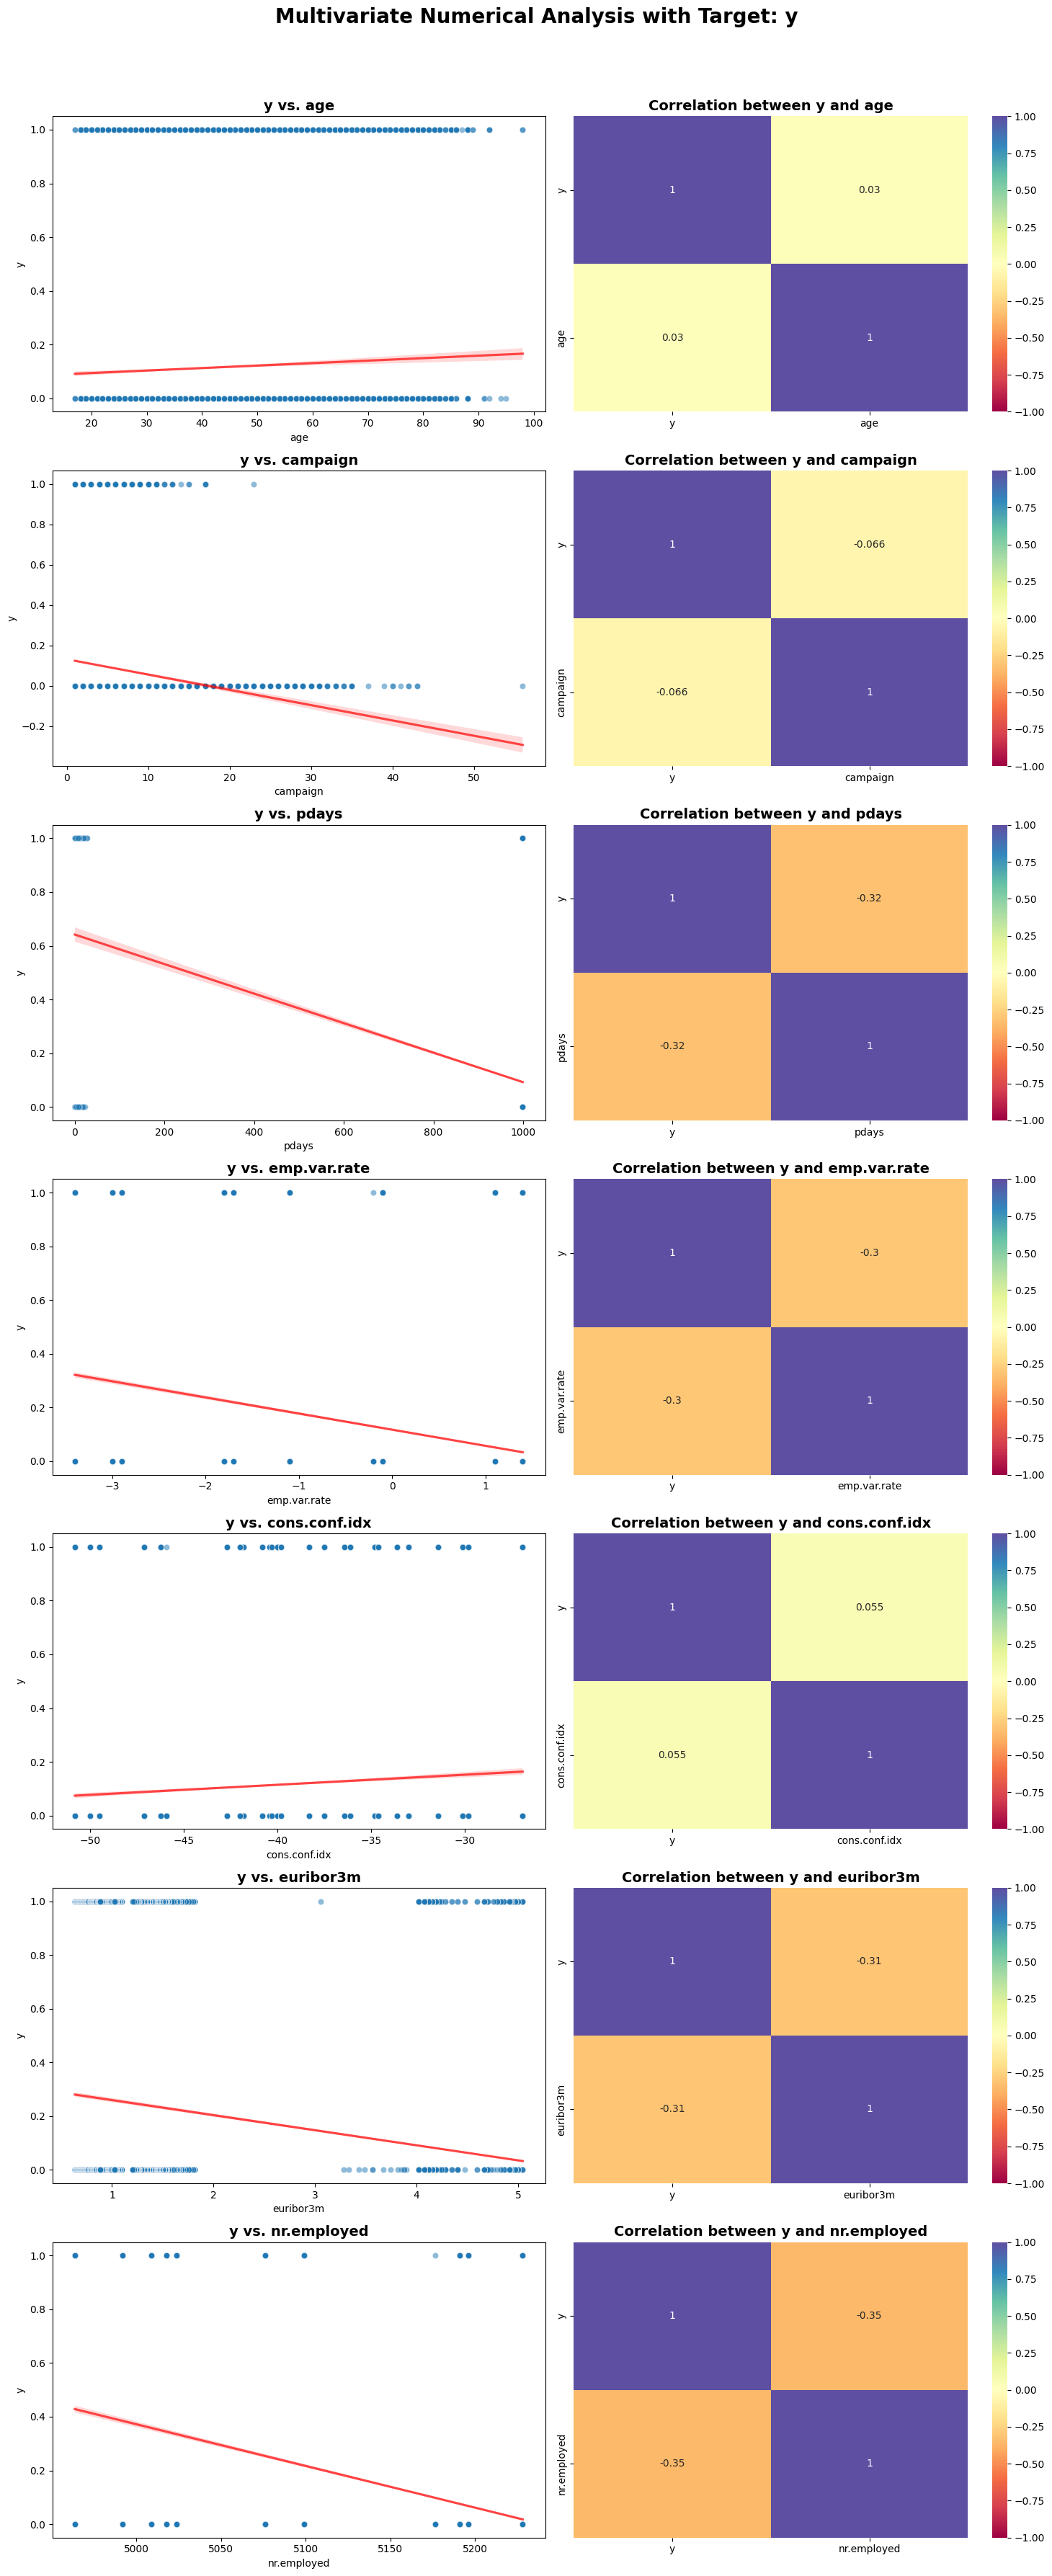

In [37]:
def multivariate_numeric_analysis(bank, target_variable, numerical_columns):
    """
    Generates scatter plots and correlation matrices between the variable of interest and other numerical variables.

    Parameters:
    - bank: DataFrame containing the data.
    - target_variable: String representing the name of the variable of interest (must be in numerical format).
    - numerical_columns: List of strings with the names of the numerical columns for analysis.
    """
    # Subplots configuration
    num_vars = len(numerical_columns)
    fig, axes = plt.subplots(num_vars, 2, figsize=(15, num_vars * 5))
    fig.suptitle(f'Multivariate Numerical Analysis with Target: {target_variable}', fontsize=20, fontweight= 'bold', y=1.02)
    
    # Loop through numeric variables
    for i, col in enumerate(numerical_columns):
        # Scatterplot with regression line
        sns.scatterplot(ax=axes[i, 0], data=bank_n, x=col, y=target_variable, alpha=0.5)
        sns.regplot(ax=axes[i, 0], data=bank_n, x=col, y=target_variable, scatter=False, color='red', line_kws={"alpha":0.7})
        axes[i, 0].set_title(f'{target_variable} vs. {col}', fontsize=14, fontweight='bold')
        
        # Correlation matrix between the target variable and the numerical variable
        corr_data = bank_n[[target_variable, col]].corr()
        sns.heatmap(ax=axes[i, 1], data=corr_data, annot=True, cmap='Spectral', cbar=True, vmin=-1, vmax=1)
        axes[i, 1].set_title(f'Correlation between {target_variable} and {col}', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Usage example with the DataFrame bank_refined, the variable of interest 'y_n' and a list of numeric variables
numerical_columns = ['age', 'campaign', 'pdays', 'emp.var.rate', 'cons.conf.idx', 'euribor3m', 'nr.employed']
target_variable = 'y'
multivariate_numeric_analysis(bank_n, target_variable, numerical_columns)

**ANÁLISIS DE VARIABLE CATEGÓRICA - CATEGÓRICA**

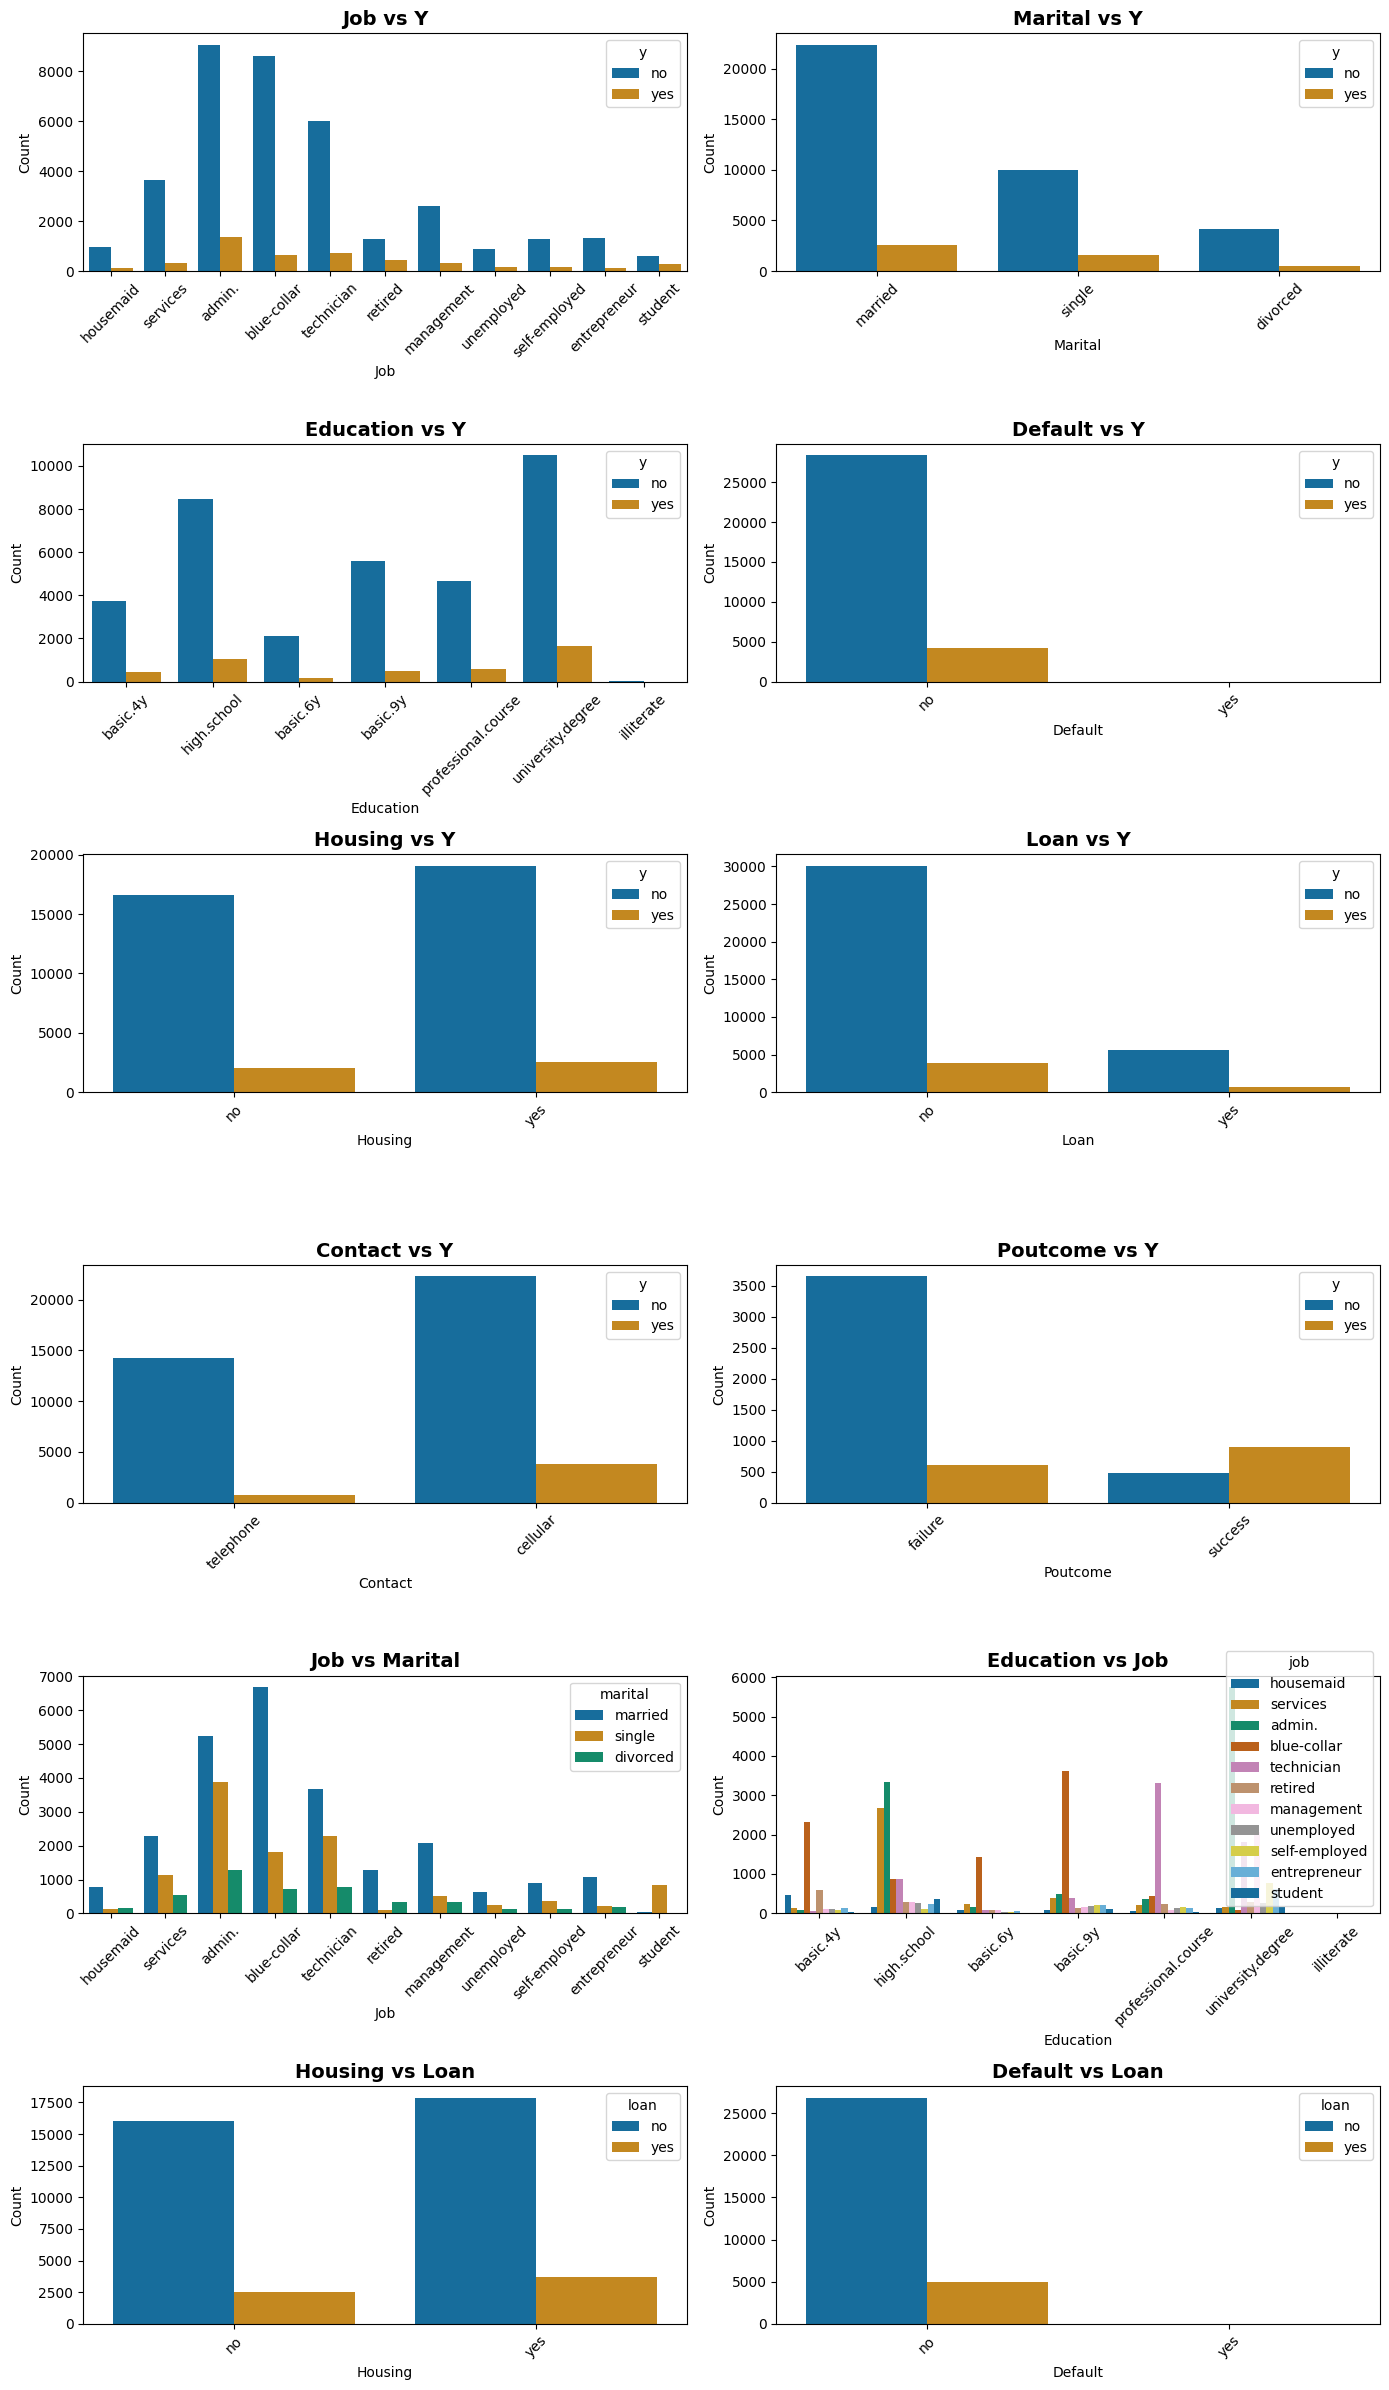

In [38]:
# Defines categorical variables for cross-analysis
categorical_pairs = [
    ('job', 'y'),
    ('marital', 'y'),
    ('education', 'y'),
    ('default', 'y'),
    ('housing', 'y'),
    ('loan', 'y'),
    ('contact', 'y'),
    ('poutcome', 'y'),
    # Additional pairs to understand specific combinations
    ('job', 'marital'),
    ('education', 'job'),
    ('housing', 'loan'),
    ('default', 'loan')
]

# Calculate the number of rows required for 2 column layout
num_rows = (len(categorical_pairs) + 1) // 2

# Create figure and axes with 2 columns layout
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 4))
plt.subplots_adjust(hspace=0.5)

# Flatten axes for easy iteration
axes = axes.flatten()


# Generate stacked bar plots for each pair in `categorical_pairs`
for i, (var1, var2) in enumerate(categorical_pairs):
    # Stacked bar plot for cross-lagged analysis
    sns.countplot(data=bank_refined, x=var1, hue=var2, ax=axes[i], palette="colorblind")
    axes[i].set_title(f'{var1.capitalize()} vs {var2.capitalize()}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(var1.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused axes if there's an odd number of pairs
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Final layout adjustment
plt.tight_layout()
plt.show()

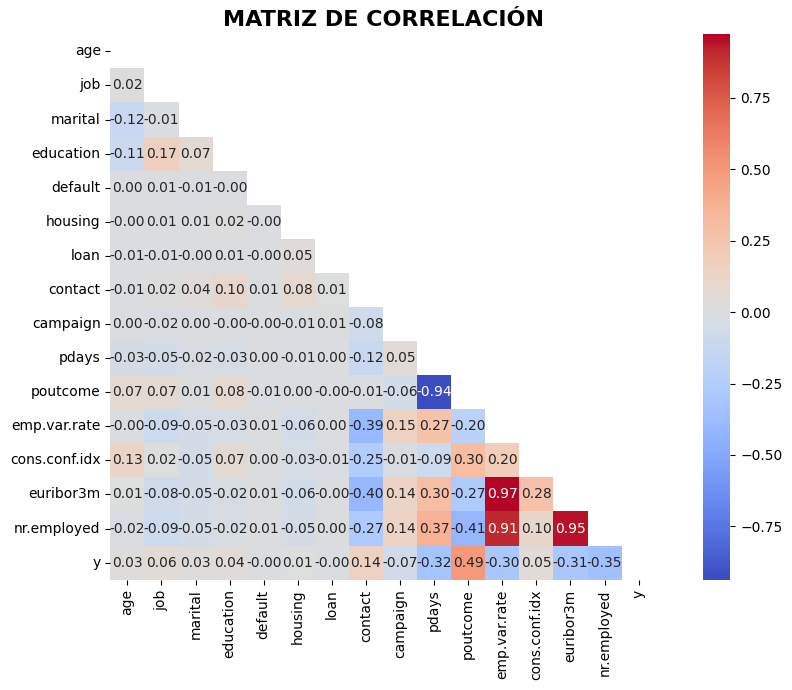

In [40]:
corr_matrix = bank_n.corr()

plt.figure(figsize=(10, 7))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=np.triu(corr_matrix), square=True)

plt.title("MATRIZ DE CORRELACIÓN", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

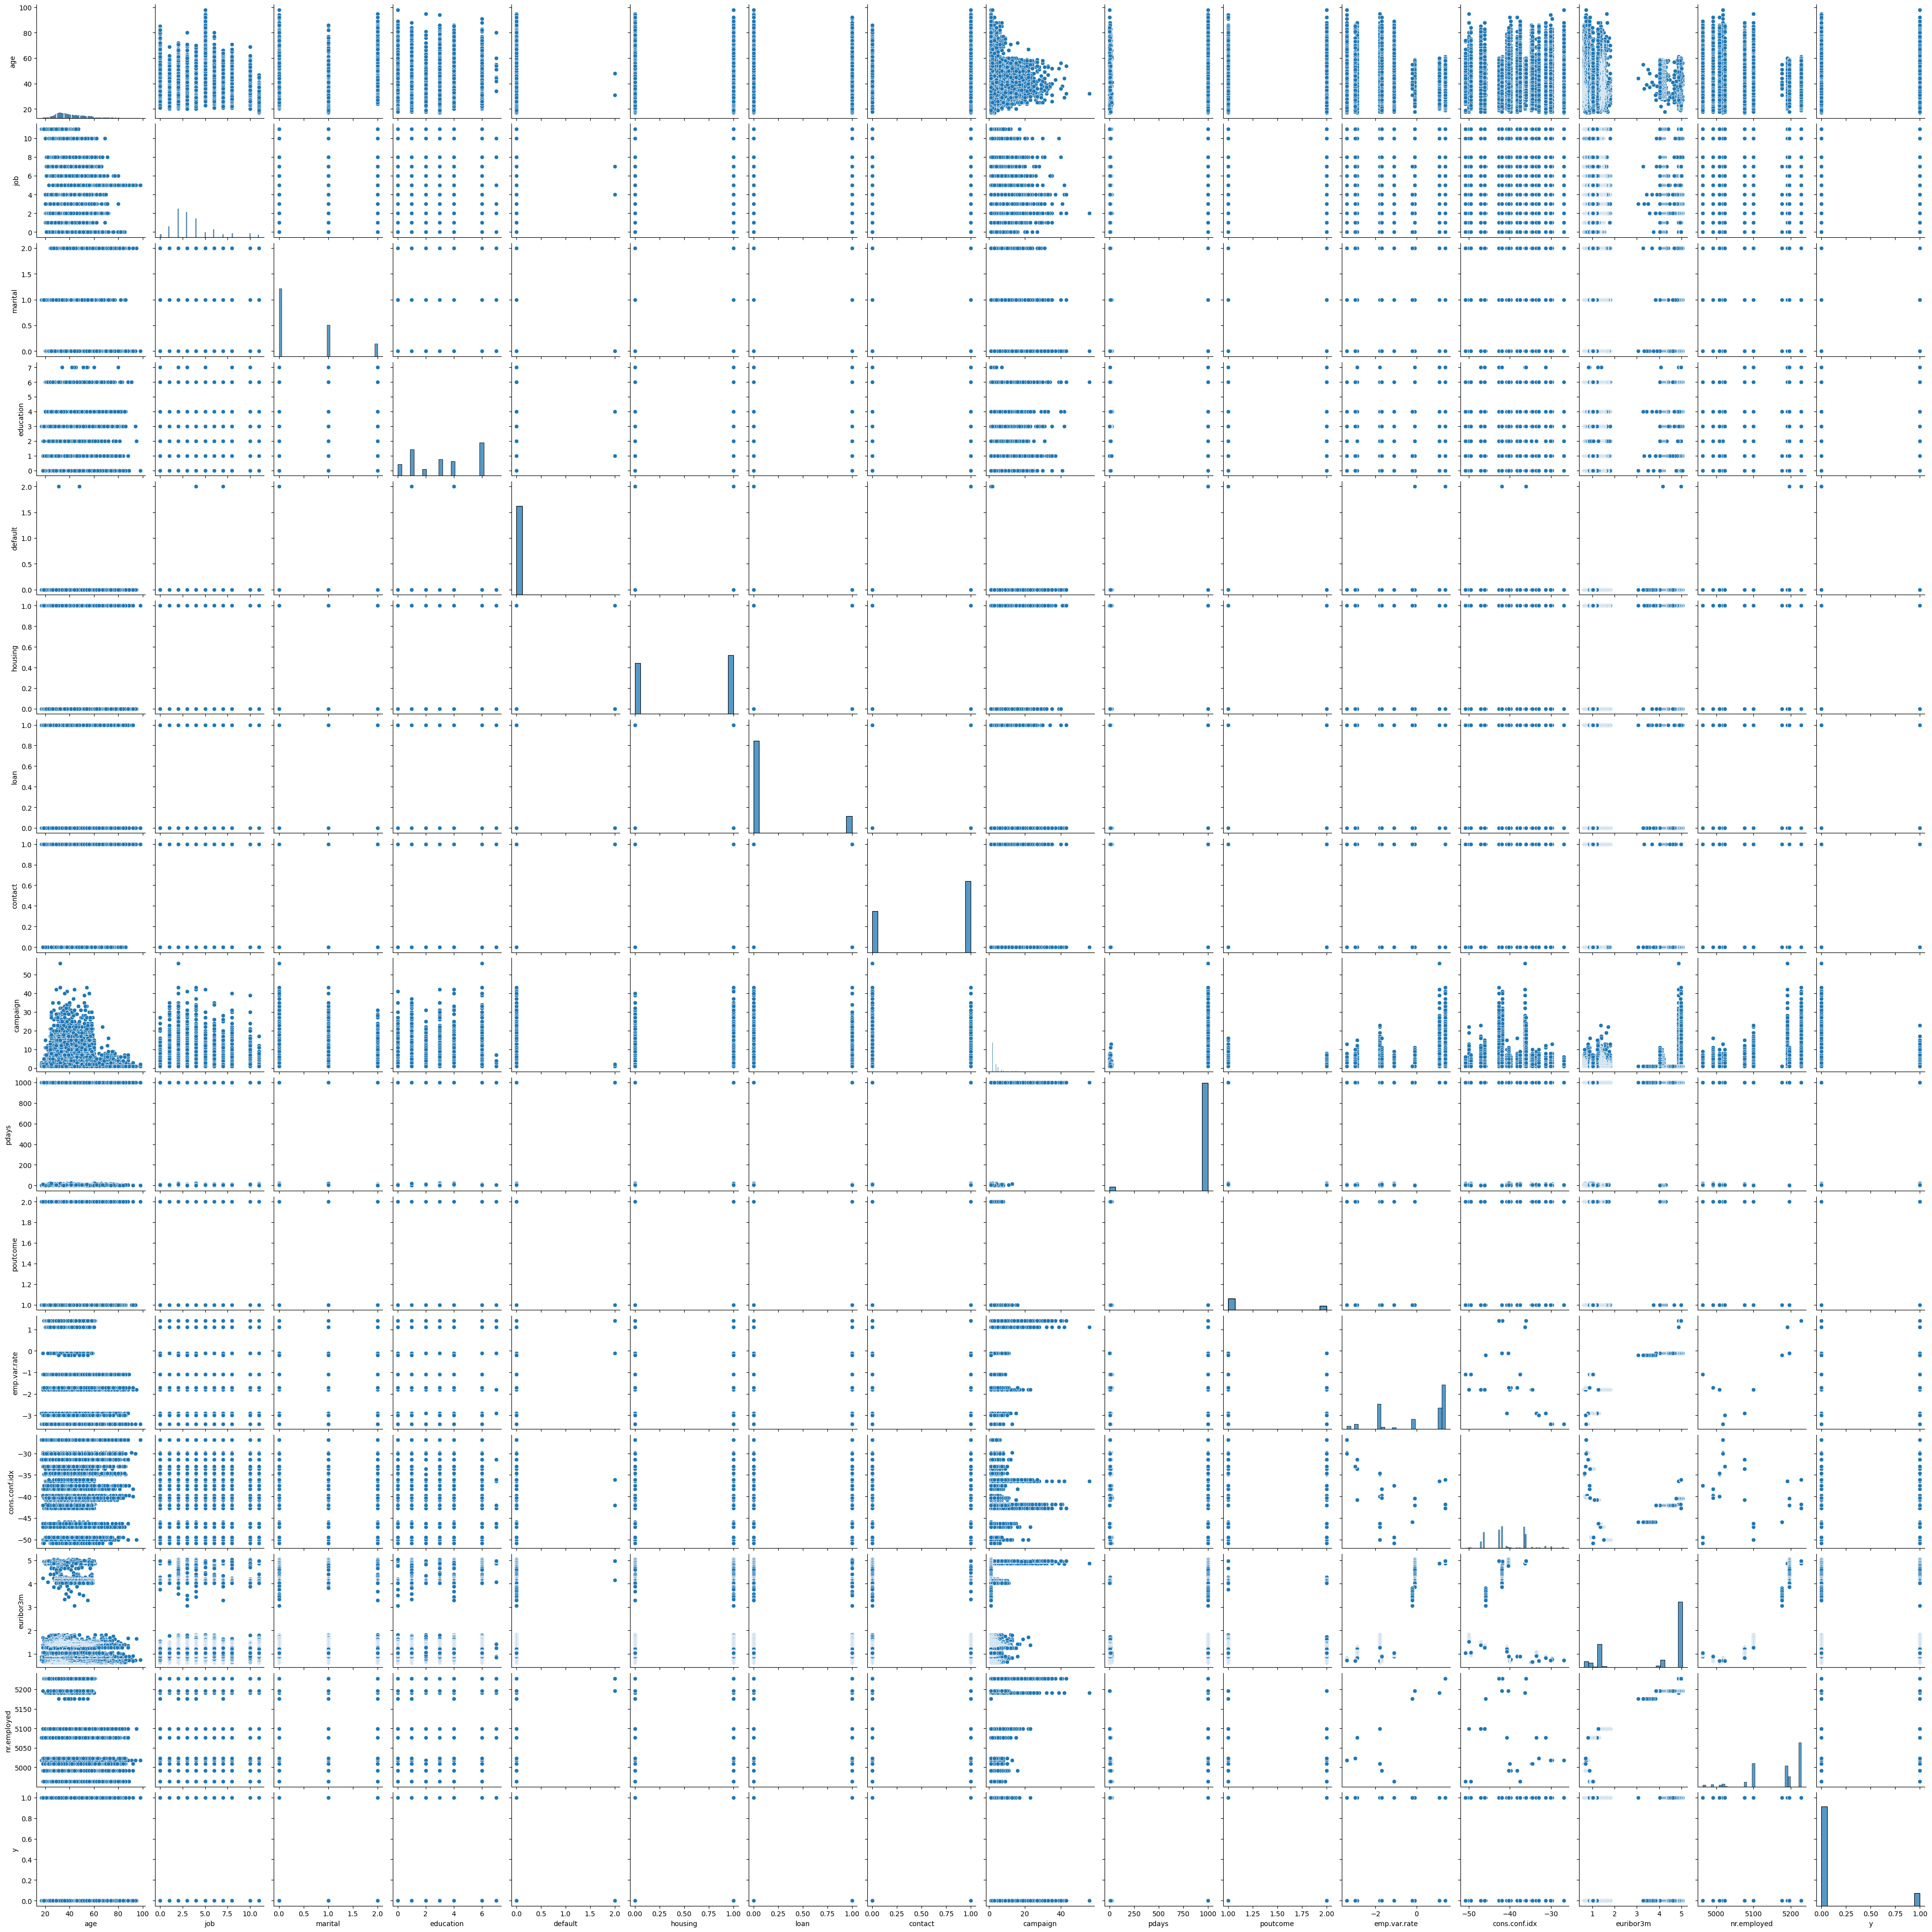

In [42]:

sns.pairplot(data=bank_n)
plt.show()

**ANÁLISIS DE OUTLIERS**

In [43]:
# Generates descriptive statistics for the DataFrame `df_n` and rounds them to 2 decimal places
bank_stats = bank_n.describe().round(2)
bank_stats

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00,40846.00,41096.00,39446.0,32580.00,40186.00,40186.00,41176.00,41176.00,41176.00,5625.00,41176.00,41176.00,41176.00,41176.00,41176.00
mean,40.02,3.63,0.51,3.2,0.00,0.54,0.16,0.63,2.57,962.46,1.24,0.08,-40.50,3.62,5167.03,0.11
std,10.42,2.42,0.69,2.2,0.02,0.50,0.36,0.48,2.77,186.94,0.43,1.57,4.63,1.73,72.25,0.32
min,17.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.00,0.00,1.00,-3.40,-50.80,0.63,4963.60,0.00
25%,32.00,2.00,0.00,1.0,0.00,0.00,0.00,0.00,1.00,999.00,1.00,-1.80,-42.70,1.34,5099.10,0.00
50%,38.00,3.00,0.00,3.0,0.00,1.00,0.00,1.00,2.00,999.00,1.00,1.10,-41.80,4.86,5191.00,0.00
75%,47.00,4.00,1.00,6.0,0.00,1.00,0.00,1.00,3.00,999.00,1.00,1.40,-36.40,4.96,5228.10,0.00
max,98.00,11.00,2.00,7.0,2.00,1.00,1.00,1.00,56.00,999.00,2.00,1.40,-26.90,5.04,5228.10,1.00


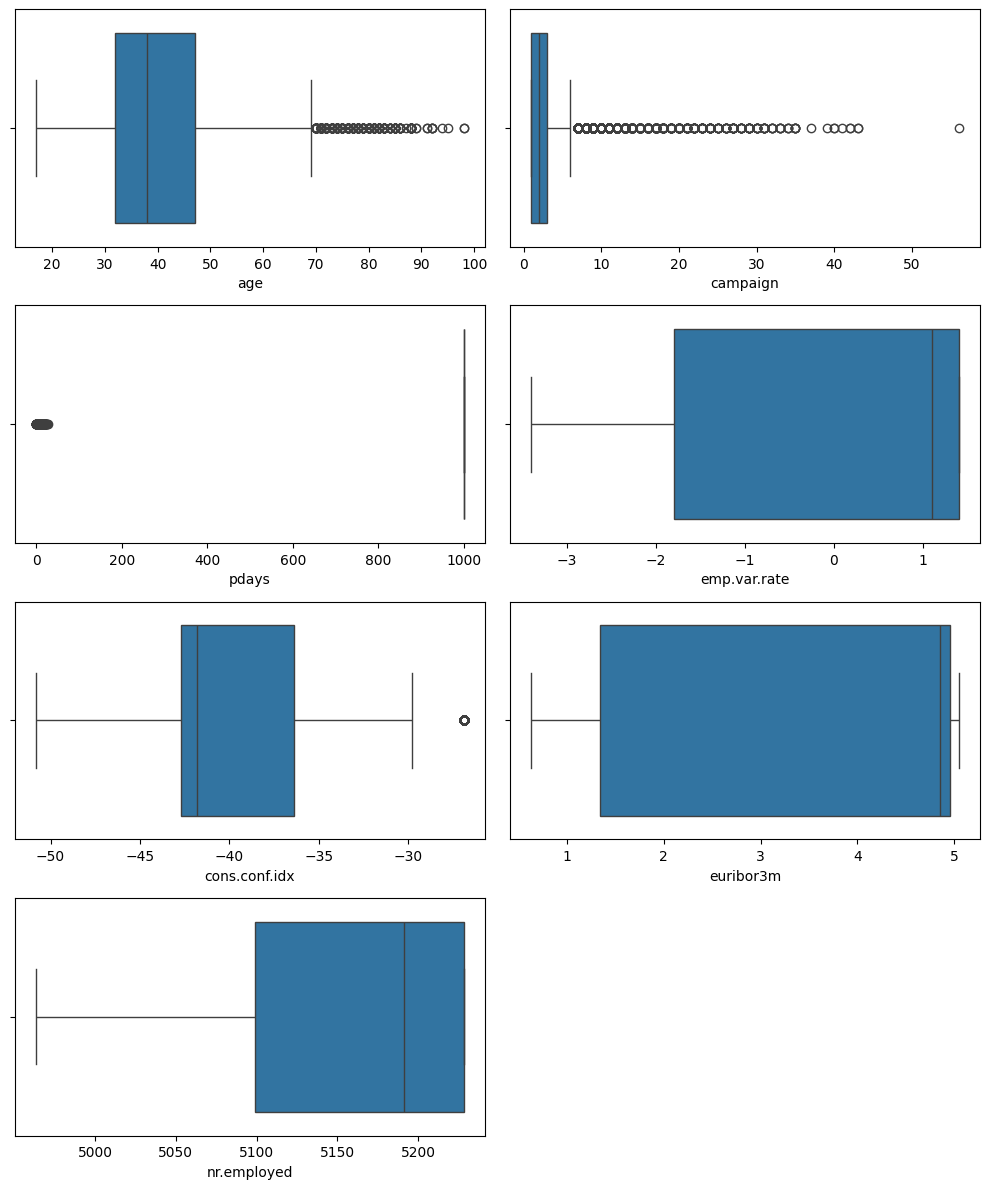

In [44]:
fig, ax = plt.subplots(4, 2, figsize=(10, 12))

sns.boxplot(ax = ax[0,0], data = bank_n, x='age')
sns.boxplot(ax = ax[0,1], data = bank_n, x='campaign')

sns.boxplot(ax = ax[1,0], data = bank_n, x='pdays')
sns.boxplot(ax = ax[1,1], data = bank_n, x='emp.var.rate')

sns.boxplot(ax = ax[2,0], data = bank_n, x='cons.conf.idx')
sns.boxplot(ax = ax[2,1], data = bank_n, x='euribor3m')

sns.boxplot(ax = ax[3,0], data = bank_n, x='nr.employed')

# Remove the empty subplot
fig.delaxes(ax[3, 1])

plt.tight_layout()
plt.show()

In [50]:
bank_with_outliers = bank_n.copy()

In [51]:
bank_without_outliers = bank_n.copy()

In [52]:
def remove_outliers(x, feature_name, allow_neg=True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr*1.5)
    lower_lim = q1 - (iqr*1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda x: upper_lim if (x > upper_lim) else (lower_lim if (x < lower_lim) else x))

    filename = f'./enc/outliers_lims_{feature_name}.json'
    json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, open(filename, 'w'))

    return x

In [49]:
bank_without_outliers['age'] = remove_outliers(bank_without_outliers['age'], 'age')
bank_without_outliers['campaign'] = remove_outliers(bank_without_outliers['campaign'], 'campaign')
bank_without_outliers['pdays'] = remove_outliers(bank_without_outliers['pdays'], 'pdays')

FileNotFoundError: [Errno 2] No such file or directory: './enc/outliers_lims_age.json'